In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange

In [19]:
# create a list of magnitudes with even spacing from 0 to 1
num_bins = 100
t = torch.linspace(0,1, num_bins).expand(256, num_bins)  # [batch_size, num_bins]

# preterb the spacing
mid = (t[:, :-1] + t[:, 1:]) / 2.
lower = torch.cat((t[:, :1], mid), -1)
upper = torch.cat((mid, t[:, -1:]), -1)
u = torch.rand(t.shape)
t = lower + (upper - lower) * u  # [batch_size, nb_bins]
t = rearrange(t, 'a b -> b a')  # [num_bins, batch_size]  take transpose so that multiplication can broadcast

# multiply the magnitude to ground truth distance and add 3 meter
t = torch.sqrt(t)
t = torch.sqrt(t)
t2 = 2 - t
t = torch.hstack((t, t2))

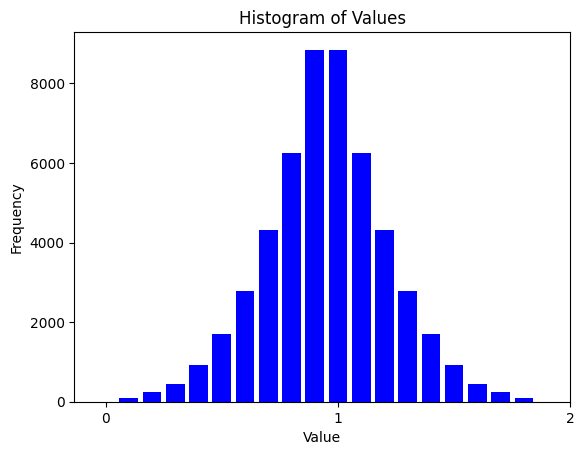

In [22]:
# Move the tensor to CPU if it's not already (necessary if using CUDA tensors)
data = t.to('cpu')

# Convert the tensor to a numpy array and flatten it
data_numpy = data.numpy().flatten()

# Plot the histogram
plt.hist(data_numpy, bins=[0. , 0.1 ,0.2 ,0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9 ,1.  ,1.1 ,1.2 ,1.3 ,1.4 ,1.5 ,1.6 ,1.7,
 1.8 ,1.9], align='left', color='blue', rwidth=0.8)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.xticks([0, 1, 2])  # Set x-ticks to correspond to the values in the data
plt.show()